# Case Study on Unsupervised Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**1. Reading dataset into the environment**

In [2]:
data = pd.read_csv(r'D:\ICT DSA\Datasets-20211106\Wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Summary of data

In [3]:
data.shape

(178, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Count of null values

In [6]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Correlation Heatmap

<AxesSubplot:>

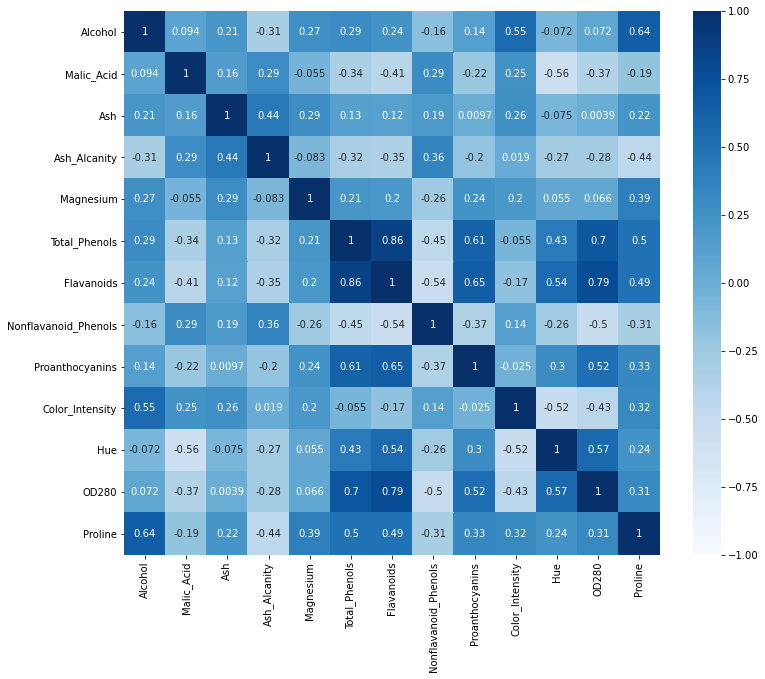

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), vmin = -1, vmax=1, cmap='Blues', annot=True)

Distribution plots of features

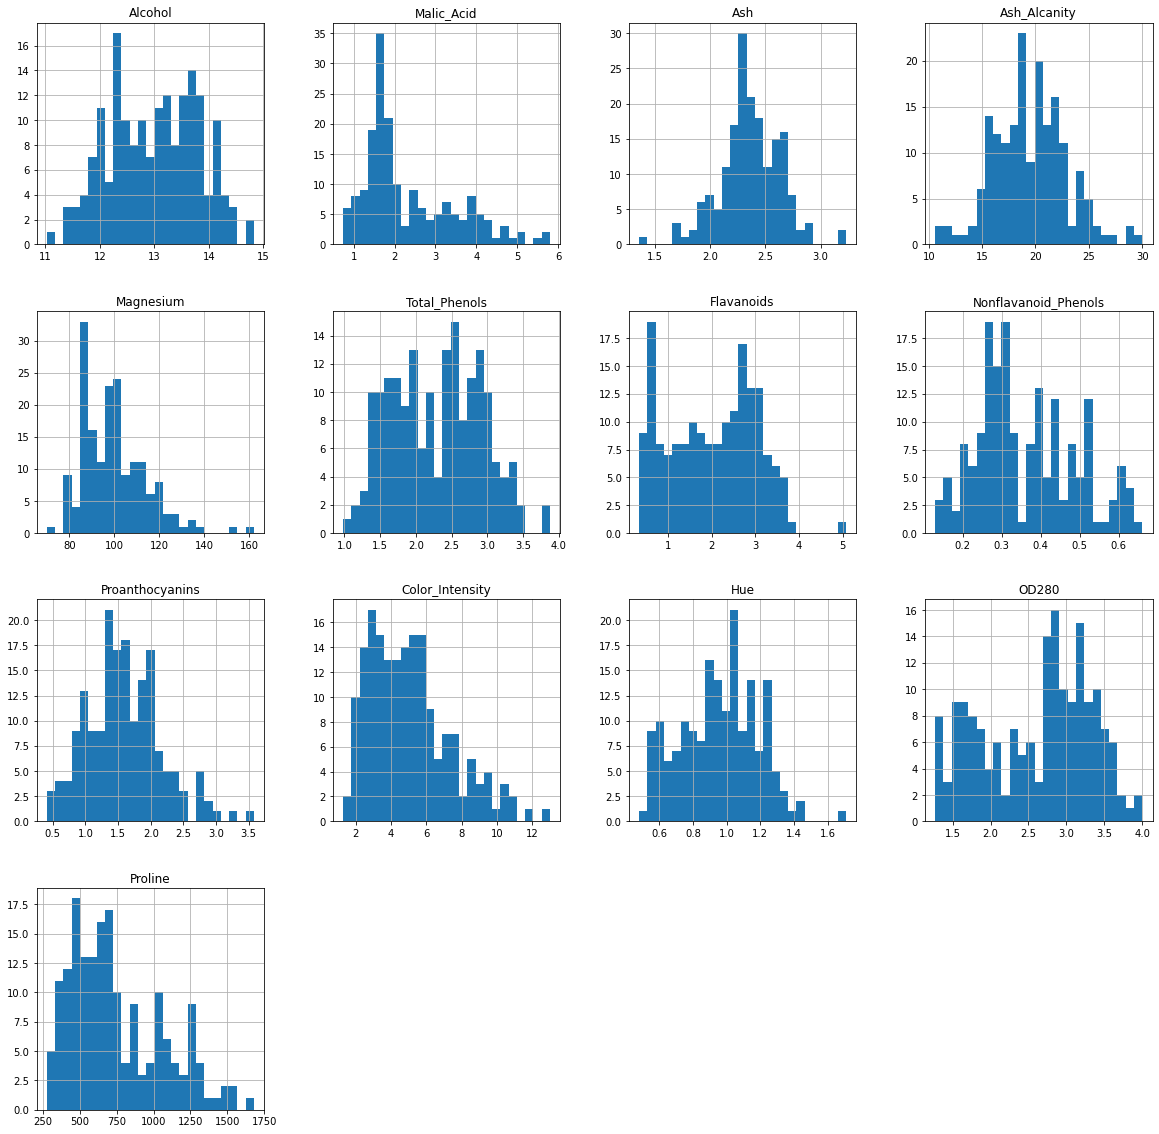

In [8]:
plt.rcParams["figure.figsize"] = (20,20)
data.hist(bins=25)
plt.show()

**Feature Scaling**

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_data = sc.fit_transform(data)
sc_data = pd.DataFrame(sc_data, columns = data.columns)
sc_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


**PCA**

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(data)
x_pca.shape

(178, 2)

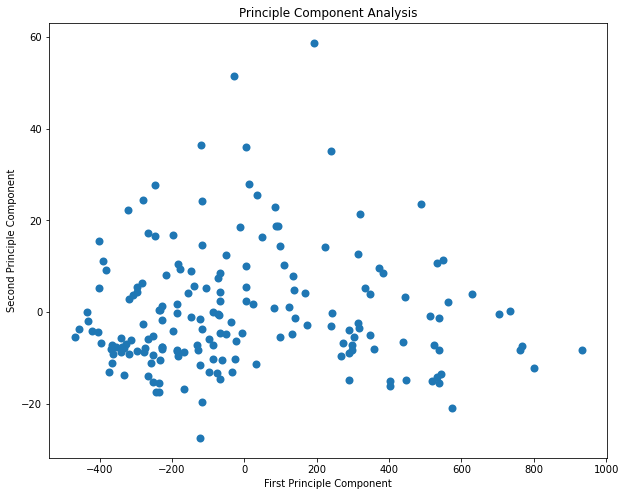

In [11]:
plt.figure(figsize = (10,8))
plt.scatter(x_pca[:, 0], x_pca[:,1], lw = 2)
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.title('Principle Component Analysis')
plt.show()

**2. Clustering and modelling**

**k-means clustering**

In [12]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

C:\Users\HARSHA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


17592296.383508474
4543749.614531863
2370689.6867829696
1337029.4929415903
916379.1871539167
647326.0020260852
412303.82825080125
323223.2470542671
270954.9292415374
217887.3785603329


Elbow Method

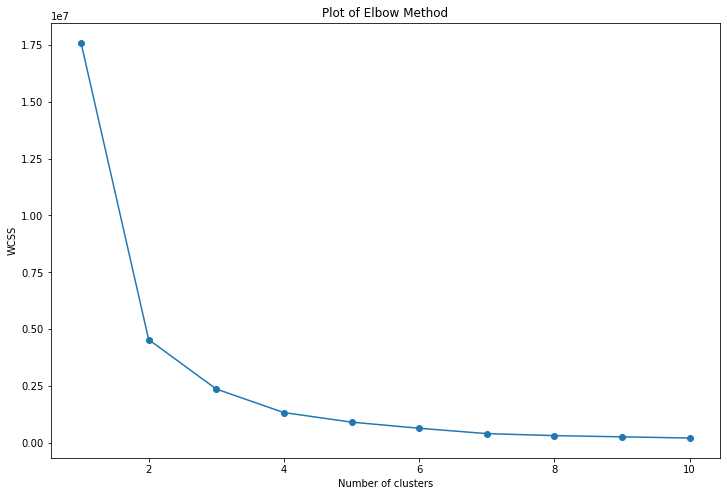

In [13]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss, 'o-')
plt.title("Plot of Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see that k = 3 is the optimum number of clusters using the elbow method.

Applying k-means 

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = pd.Series(kmeans.fit_predict(data))
y_kmeans

0      1
1      1
2      1
3      1
4      2
      ..
173    2
174    2
175    2
176    2
177    0
Length: 178, dtype: int32

Number of datapoints in each cluster can be calculated as:

In [15]:
y_kmeans.value_counts()

0    69
2    62
1    47
dtype: int64

Calculating Centroids

In [16]:
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids) #centroids of principle components

In [17]:
centroids

array([[1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02],
       [1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02]])

In [18]:
centroids_pca

array([[-288.75258647,   -2.23889973],
       [ 448.29677492,   -2.2569996 ],
       [ -18.48419282,    4.20263004]])

Visualizing Clusters

In [19]:
pca_df = pd.DataFrame(x_pca, columns = ['PCA 1', 'PCA 2'])
pca_df['Cluster'] = y_kmeans
pca_df

,PCA 1,PCA 2,Cluster
0,318.562979,21.492131,1
1,303.097420,-5.364718,1
2,438.061133,-6.537309,1
3,733.240139,0.192729,1
4,-11.571428,18.489995,2
...,...,...,...
173,-6.980211,-4.541137,2
174,3.131605,2.335191,2
175,88.458074,18.776285,2
176,93.456242,18.670819,2


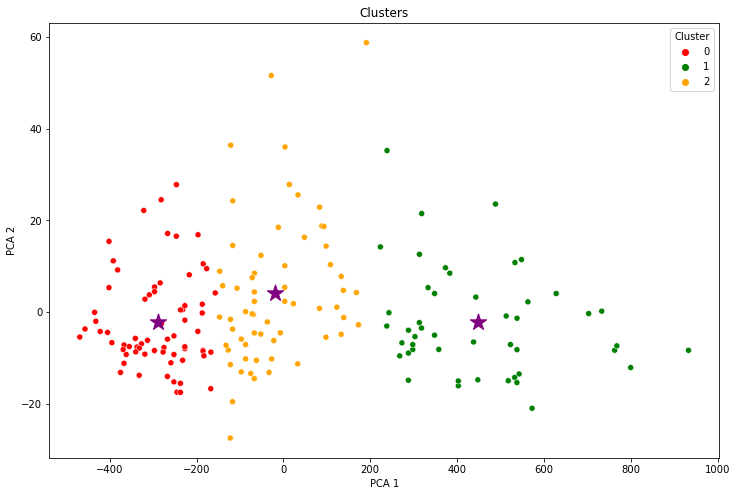

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'PCA 1', y = 'PCA 2', hue = 'Cluster', data = pca_df, palette = ['red', 'green', 'orange'])
plt.scatter(x = centroids_pca[:, 0], y = centroids_pca[:, 1],marker = '*', color = 'purple', s=300)
plt.title('Clusters')
plt.show()

**Agglomerative Hierarchical Clustering**

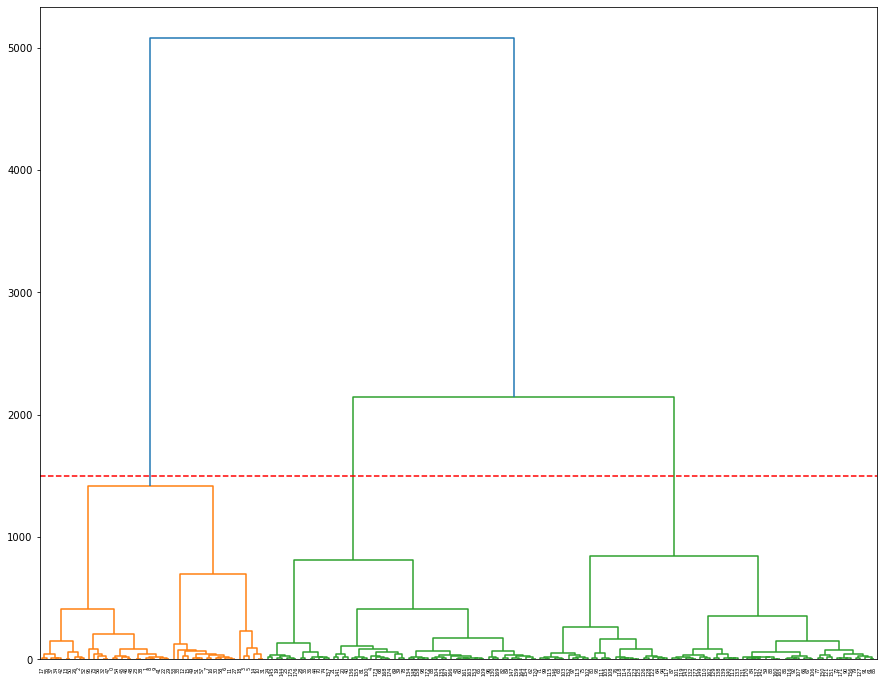

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15,12))
link = linkage(data, method = 'ward')
dendrogram(link, leaf_rotation = 90.)
plt.hlines(1500, 0, 5000, colors = 'r', linestyle = 'dashed')
plt.show()

Optimum number of clusters is 3.

In [22]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
labels = cluster.fit_predict(data)
print(labels)

[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 0 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]


Count of values in each cluster:

In [27]:
label, count = np.unique(labels, return_counts = True)
print(np.asarray((label, count)).T)

[[ 0 48]
 [ 1 72]
 [ 2 58]]


Predicted clusters

In [32]:
predict = pd.Series(labels)
predict.head()

0    0
1    0
2    0
3    0
4    2
dtype: int64

In [30]:
#parameter values 
cluster.get_params()

{'affinity': 'euclidean',
 'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'n_clusters': 3}

In [31]:
#Number of leaves in the hierarchical tree
cluster.n_leaves_

178